In [1]:
#Import the required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing


In [2]:
#read the data
df = pd.read_csv('Donor Raw Data_ML with Python.csv')

In [3]:
fd = pd.read_csv('Prospective Donor_ML with Python.csv')

In [4]:
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [5]:
fd.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONTROL_NUMBER               2148 non-null   int64  
 1   MONTHS_SINCE_ORIGIN          2148 non-null   int64  
 2   DONOR_AGE                    1619 non-null   float64
 3   IN_HOUSE                     2148 non-null   int64  
 4   URBANICITY                   2148 non-null   object 
 5   SES                          2148 non-null   object 
 6   CLUSTER_CODE                 2148 non-null   object 
 7   HOME_OWNER                   2148 non-null   object 
 8   DONOR_GENDER                 2148 non-null   object 
 9   INCOME_GROUP                 1667 non-null   float64
 10  PUBLISHED_PHONE              2148 non-null   int64  
 11  OVERLAY_SOURCE               2148 non-null   object 
 12  MOR_HIT_RATE                 2148 non-null   int64  
 13  WEALTH_RATING     

In [8]:
#to check for missing values
df.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [9]:
#dropping the missing values of amount donated 
df = df.dropna(how = 'any', subset =['TARGET_D'])

In [10]:
df.shape

(4843, 50)

In [11]:
df.shape

(4843, 50)

In [12]:
fd.shape

(2148, 48)

In [13]:
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 1 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     4843 non-null   int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               4843 non-null   int64  
 3   MONTHS_SINCE_ORIGIN          4843 non-null   int64  
 4   DONOR_AGE                    3679 non-null   float64
 5   IN_HOUSE                     4843 non-null   int64  
 6   URBANICITY                   4843 non-null   object 
 7   SES                          4843 non-null   object 
 8   CLUSTER_CODE                 4843 non-null   object 
 9   HOME_OWNER                   4843 non-null   object 
 10  DONOR_GENDER                 4843 non-null   object 
 11  INCOME_GROUP                 3740 non-null   float64
 12  PUBLISHED_PHONE              4843 non-null   int64  
 13  OVERLAY_SOURCE   

In [15]:
##this gives us more information about the columns
for (index,column) in enumerate(df.columns):
    print(f"Column {index}: {column}")
    print(df[column].nunique())


Column 0: TARGET_B
1
Column 1: TARGET_D
70
Column 2: CONTROL_NUMBER
4843
Column 3: MONTHS_SINCE_ORIGIN
20
Column 4: DONOR_AGE
76
Column 5: IN_HOUSE
2
Column 6: URBANICITY
6
Column 7: SES
5
Column 8: CLUSTER_CODE
54
Column 9: HOME_OWNER
2
Column 10: DONOR_GENDER
4
Column 11: INCOME_GROUP
7
Column 12: PUBLISHED_PHONE
2
Column 13: OVERLAY_SOURCE
4
Column 14: MOR_HIT_RATE
51
Column 15: WEALTH_RATING
10
Column 16: MEDIAN_HOME_VALUE
1938
Column 17: MEDIAN_HOUSEHOLD_INCOME
727
Column 18: PCT_OWNER_OCCUPIED
100
Column 19: PER_CAPITA_INCOME
4111
Column 20: PCT_ATTRIBUTE1
45
Column 21: PCT_ATTRIBUTE2
76
Column 22: PCT_ATTRIBUTE3
84
Column 23: PCT_ATTRIBUTE4
96
Column 24: PEP_STAR
2
Column 25: RECENT_STAR_STATUS
23
Column 26: RECENCY_STATUS_96NK
6
Column 27: FREQUENCY_STATUS_97NK
4
Column 28: RECENT_RESPONSE_PROP
109
Column 29: RECENT_AVG_GIFT_AMT
521
Column 30: RECENT_CARD_RESPONSE_PROP
38
Column 31: RECENT_AVG_CARD_GIFT_AMT
323
Column 32: RECENT_RESPONSE_COUNT
15
Column 33: RECENT_CARD_RESPONSE

In [16]:
df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,4843.0,4843.000000,4843.000000,4843.000000,3679.000000,4843.000000,3740.000000,4843.000000,4843.000000,2764.000000,...,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1.0,15.624344,98925.669007,77.896965,59.979070,0.091679,4.036631,0.494941,3.570514,5.169682,...,11.421509,18.177266,6.755757,15.168959,5.452406,13.223209,17.563494,73.810035,11.836942,6.115837
std,0.0,12.445137,58283.333050,41.070796,15.943632,0.288602,1.842994,0.500026,9.559880,2.793108,...,19.088202,20.726513,9.199466,13.526867,1.432336,5.288803,4.258850,37.494103,10.147922,4.892441
min,1.0,1.000000,12.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,2.260000,0.000000
25%,1.0,10.000000,46171.500000,41.000000,48.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,11.000000,3.000000,10.000000,5.000000,11.000000,16.000000,40.000000,7.180000,2.000000
50%,1.0,13.000000,101654.000000,77.000000,61.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,15.000000,5.000000,15.000000,6.000000,13.000000,18.000000,75.000000,10.000000,5.000000
75%,1.0,20.000000,151716.000000,113.000000,73.000000,0.000000,5.000000,1.000000,4.000000,8.000000,...,15.000000,20.000000,10.000000,20.000000,6.000000,14.000000,19.000000,110.000000,14.500000,9.000000
max,1.0,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,59.000000,27.000000,260.000000,450.000000,41.000000


In [17]:
dff = df.copy()

In [18]:
dff.isnull().sum()

TARGET_B                          0
TARGET_D                          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                      1164
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                   1103
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  2079
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK       

In [19]:
dff.dtypes

TARGET_B                         int64
TARGET_D                       float64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS       

In [20]:
#checking the value count of different variables
dff.DONOR_AGE.value_counts()

67.0    119
75.0    113
73.0    108
77.0    108
69.0     98
       ... 
20.0      1
15.0      1
4.0       1
21.0      1
14.0      1
Name: DONOR_AGE, Length: 76, dtype: int64

In [21]:
dff.INCOME_GROUP.value_counts()

5.0    812
4.0    640
2.0    632
6.0    431
7.0    426
3.0    423
1.0    376
Name: INCOME_GROUP, dtype: int64

In [22]:
dff.WEALTH_RATING.value_counts()

9.0    381
8.0    359
7.0    327
6.0    311
5.0    273
3.0    272
4.0    250
2.0    222
1.0    208
0.0    161
Name: WEALTH_RATING, dtype: int64

In [23]:
dff.MONTHS_SINCE_LAST_PROM_RESP.value_counts()

 18.0    829
 17.0    775
 16.0    678
 15.0    527
 19.0    423
 21.0    362
 20.0    304
 24.0    240
 26.0    158
 22.0    156
 23.0    141
 25.0     93
 11.0     23
 12.0     18
 27.0     13
 30.0     12
 28.0      9
 13.0      9
 29.0      6
 14.0      5
 9.0       5
 10.0      3
 33.0      3
 32.0      2
 8.0       2
 31.0      2
 6.0       1
-11.0      1
 3.0       1
-9.0       1
 2.0       1
 35.0      1
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: int64

In [24]:
dff.URBANICITY.value_counts()

S    1187
T    1006
C    1006
R     927
U     577
?     140
Name: URBANICITY, dtype: int64

In [25]:
dff.SES.value_counts()

2    2318
1    1583
3     733
?     140
4      69
Name: SES, dtype: int64

#### Dealing with miscellaneous data
There are some misellaneous values in the data set like '?' and ' .'
We will deal with them now

In [26]:
dff = dff.replace("?",np.nan)

In [27]:
dff['CLUSTER_CODE'] = dff.CLUSTER_CODE.replace(' .',0)

In [28]:
dff.isnull().sum()

TARGET_B                          0
TARGET_D                          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                      1164
IN_HOUSE                          0
URBANICITY                      140
SES                             140
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                   1103
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  2079
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK       

In [29]:
dff.dtypes

TARGET_B                         int64
TARGET_D                       float64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS       

#### DATA MUNGING & DATA CLEANING
For Numerical variables, I used mean imputation to deal with missing values.

Mean imputation is a method in which the missing value on a certain variable is replaced by the mean of the available cases.

In [30]:
dff['DONOR_AGE'].interpolate(method='linear', axis=0, inplace=True)

In [31]:
dff['MONTHS_SINCE_LAST_PROM_RESP'].interpolate(method='linear', axis=0, inplace=True)

In [32]:
#we wil handle the missing Categorical data using mode
dff['WEALTH_RATING']= dff['WEALTH_RATING'].fillna(dff['WEALTH_RATING'].mode().iloc[0])
dff['INCOME_GROUP']= dff['INCOME_GROUP'].fillna(dff['INCOME_GROUP'].mode().iloc[0])

dff['URBANICITY']= dff['URBANICITY'].fillna(dff['URBANICITY'].mode().iloc[0])
dff['SES']= dff['SES'].fillna(dff['SES'].mode().iloc[0])

In [33]:
dff.isnull().sum()

TARGET_B                       0
TARGET_D                       0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CAR

In [34]:
dff.isnull().values.any()

False

describe() is a very useful fuction that is applicable to numerical data by default. It gives the minimum, maximum, no. of non nulls and useful statistics such as mean and standard deviation.

In [35]:
dff.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,...,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1.0,15.624344,98925.669007,77.896965,60.041297,0.091679,4.256040,0.494941,3.570514,6.813958,...,11.421509,18.177266,6.755757,15.168959,5.452406,13.223209,17.563494,73.810035,11.836942,6.115837
std,0.0,12.445137,58283.333050,41.070796,14.993192,0.288602,1.669175,0.500026,9.559880,2.836716,...,19.088202,20.726513,9.199466,13.526867,1.432336,5.288803,4.258850,37.494103,10.147922,4.892441
min,1.0,1.000000,12.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,2.260000,0.000000
25%,1.0,10.000000,46171.500000,41.000000,49.000000,0.000000,3.000000,0.000000,0.000000,5.000000,...,5.000000,11.000000,3.000000,10.000000,5.000000,11.000000,16.000000,40.000000,7.180000,2.000000
50%,1.0,13.000000,101654.000000,77.000000,61.000000,0.000000,5.000000,0.000000,0.000000,9.000000,...,10.000000,15.000000,5.000000,15.000000,6.000000,13.000000,18.000000,75.000000,10.000000,5.000000
75%,1.0,20.000000,151716.000000,113.000000,72.000000,0.000000,5.000000,1.000000,4.000000,9.000000,...,15.000000,20.000000,10.000000,20.000000,6.000000,14.000000,19.000000,110.000000,14.500000,9.000000
max,1.0,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,59.000000,27.000000,260.000000,450.000000,41.000000


#### Divided the dataframe into - numerical and categorical
To keep things simple and easy let us split the dataframe into Numerical and Categorical and explore the data.

In [36]:
df_numerical = dff.select_dtypes(include = [np.number])

In [37]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 1 to 19371
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     4843 non-null   int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               4843 non-null   int64  
 3   MONTHS_SINCE_ORIGIN          4843 non-null   int64  
 4   DONOR_AGE                    4843 non-null   float64
 5   IN_HOUSE                     4843 non-null   int64  
 6   INCOME_GROUP                 4843 non-null   float64
 7   PUBLISHED_PHONE              4843 non-null   int64  
 8   MOR_HIT_RATE                 4843 non-null   int64  
 9   WEALTH_RATING                4843 non-null   float64
 10  MEDIAN_HOME_VALUE            4843 non-null   int64  
 11  MEDIAN_HOUSEHOLD_INCOME      4843 non-null   int64  
 12  PCT_OWNER_OCCUPIED           4843 non-null   int64  
 13  PER_CAPITA_INCOME

In [38]:
df_numerical.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,...,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1.0,15.624344,98925.669007,77.896965,60.041297,0.091679,4.256040,0.494941,3.570514,6.813958,...,11.421509,18.177266,6.755757,15.168959,5.452406,13.223209,17.563494,73.810035,11.836942,6.115837
std,0.0,12.445137,58283.333050,41.070796,14.993192,0.288602,1.669175,0.500026,9.559880,2.836716,...,19.088202,20.726513,9.199466,13.526867,1.432336,5.288803,4.258850,37.494103,10.147922,4.892441
min,1.0,1.000000,12.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,2.260000,0.000000
25%,1.0,10.000000,46171.500000,41.000000,49.000000,0.000000,3.000000,0.000000,0.000000,5.000000,...,5.000000,11.000000,3.000000,10.000000,5.000000,11.000000,16.000000,40.000000,7.180000,2.000000
50%,1.0,13.000000,101654.000000,77.000000,61.000000,0.000000,5.000000,0.000000,0.000000,9.000000,...,10.000000,15.000000,5.000000,15.000000,6.000000,13.000000,18.000000,75.000000,10.000000,5.000000
75%,1.0,20.000000,151716.000000,113.000000,72.000000,0.000000,5.000000,1.000000,4.000000,9.000000,...,15.000000,20.000000,10.000000,20.000000,6.000000,14.000000,19.000000,110.000000,14.500000,9.000000
max,1.0,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,59.000000,27.000000,260.000000,450.000000,41.000000


Categorical variables - df_categorical

In [39]:
df_categorical = dff.select_dtypes(include = [object])

In [40]:
df_categorical = df_categorical.apply(lambda x: x.astype('category'))

In [41]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 1 to 19371
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   URBANICITY           4843 non-null   category
 1   SES                  4843 non-null   category
 2   CLUSTER_CODE         4843 non-null   category
 3   HOME_OWNER           4843 non-null   category
 4   DONOR_GENDER         4843 non-null   category
 5   OVERLAY_SOURCE       4843 non-null   category
 6   RECENCY_STATUS_96NK  4843 non-null   category
dtypes: category(7)
memory usage: 74.9 KB


describe() when applied to categorical data gives the unique classes/ categories present in each categorical feature (count), most repeated category (top) and the frequency of the occurance of the most repeated category (freq)

In [42]:
df_categorical.describe()

,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,OVERLAY_SOURCE,RECENCY_STATUS_96NK
count,4843,4843,4843,4843,4843,4843,4843
unique,5,4,54,2,4,4,6
top,S,2,40,H,F,B,A
freq,1327,2458,235,2708,2609,2238,2794


Let us start exploring the numerical data first. I used Pearson correlation on resultant variable 'Target_D = Amount donated' to find out the strongest correlated variables that effect the final sale price of the house

In [43]:
df_numerical_corr = df_numerical.corr(method='pearson')['TARGET_D']

In [44]:
#Sort the features with the strongest correlated variable on the top
df_numerical_corr[np.argsort(df_numerical_corr, axis=0)[::-1]]

TARGET_B                            NaN
RECENT_RESPONSE_PROP          -0.292625
LIFETIME_MIN_GIFT_AMT          0.295783
MONTHS_SINCE_FIRST_GIFT       -0.127522
LIFETIME_GIFT_COUNT           -0.220247
RECENT_CARD_RESPONSE_PROP     -0.221056
LIFETIME_GIFT_RANGE            0.338629
LIFETIME_AVG_GIFT_AMT          0.516724
LIFETIME_MAX_GIFT_AMT          0.443145
LIFETIME_PROM                 -0.057903
PCT_OWNER_OCCUPIED            -0.007265
RECENT_CARD_RESPONSE_COUNT    -0.256911
WEALTH_RATING                  0.056533
MEDIAN_HOME_VALUE              0.126180
IN_HOUSE                       0.038842
NUMBER_PROM_12                 0.064494
CARD_PROM_12                   0.006996
MOR_HIT_RATE                   0.012679
DONOR_AGE                     -0.042986
PEP_STAR                      -0.215399
TARGET_D                       1.000000
PUBLISHED_PHONE               -0.002797
LAST_GIFT_AMT                  0.645388
PCT_ATTRIBUTE2                -0.021628
INCOME_GROUP                   0.105817


The variables that are strongly correlated with the target variable 'amount donated'

In [45]:
df_numerical_corr.sort_values(ascending = False).head(11)

TARGET_D                    1.000000
RECENT_AVG_GIFT_AMT         0.707250
LAST_GIFT_AMT               0.645388
FILE_AVG_GIFT               0.516724
LIFETIME_AVG_GIFT_AMT       0.516724
RECENT_AVG_CARD_GIFT_AMT    0.477654
LIFETIME_MAX_GIFT_AMT       0.443145
LIFETIME_GIFT_RANGE         0.338629
LIFETIME_MIN_GIFT_AMT       0.295783
LIFETIME_GIFT_AMOUNT        0.247667
PER_CAPITA_INCOME           0.135409
Name: TARGET_D, dtype: float64

In [46]:
df_numerical_topten = df_numerical[['RECENT_AVG_GIFT_AMT','LAST_GIFT_AMT','FILE_AVG_GIFT','LIFETIME_AVG_GIFT_AMT',
                                                                 'RECENT_AVG_CARD_GIFT_AMT','LIFETIME_MAX_GIFT_AMT', 'LIFETIME_GIFT_RANGE', 'LIFETIME_MIN_GIFT_AMT',
                                                                'LIFETIME_GIFT_AMOUNT', 'PER_CAPITA_INCOME', 'TARGET_D']]

### Exploratory Data Analysis

Numerical data - EDA

In [47]:
list(df_numerical.columns.values)

['TARGET_B',
 'TARGET_D',
 'CONTROL_NUMBER',
 'MONTHS_SINCE_ORIGIN',
 'DONOR_AGE',
 'IN_HOUSE',
 'INCOME_GROUP',
 'PUBLISHED_PHONE',
 'MOR_HIT_RATE',
 'WEALTH_RATING',
 'MEDIAN_HOME_VALUE',
 'MEDIAN_HOUSEHOLD_INCOME',
 'PCT_OWNER_OCCUPIED',
 'PER_CAPITA_INCOME',
 'PCT_ATTRIBUTE1',
 'PCT_ATTRIBUTE2',
 'PCT_ATTRIBUTE3',
 'PCT_ATTRIBUTE4',
 'PEP_STAR',
 'RECENT_STAR_STATUS',
 'FREQUENCY_STATUS_97NK',
 'RECENT_RESPONSE_PROP',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_AVG_CARD_GIFT_AMT',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'MONTHS_SINCE_LAST_PROM_RESP',
 'LIFETIME_CARD_PROM',
 'LIFETIME_PROM',
 'LIFETIME_GIFT_AMOUNT',
 'LIFETIME_GIFT_COUNT',
 'LIFETIME_AVG_GIFT_AMT',
 'LIFETIME_GIFT_RANGE',
 'LIFETIME_MAX_GIFT_AMT',
 'LIFETIME_MIN_GIFT_AMT',
 'LAST_GIFT_AMT',
 'CARD_PROM_12',
 'NUMBER_PROM_12',
 'MONTHS_SINCE_LAST_GIFT',
 'MONTHS_SINCE_FIRST_GIFT',
 'FILE_AVG_GIFT',
 'FILE_CARD_GIFT']

I used seaborn library to represent my graphs.

Let us explore more about the important features in more detail. This can be made convinient through plotting pairplot in Seaborn. I introduced regression line to see how deep the correlaion is.

<Figure size 1440x432 with 0 Axes>

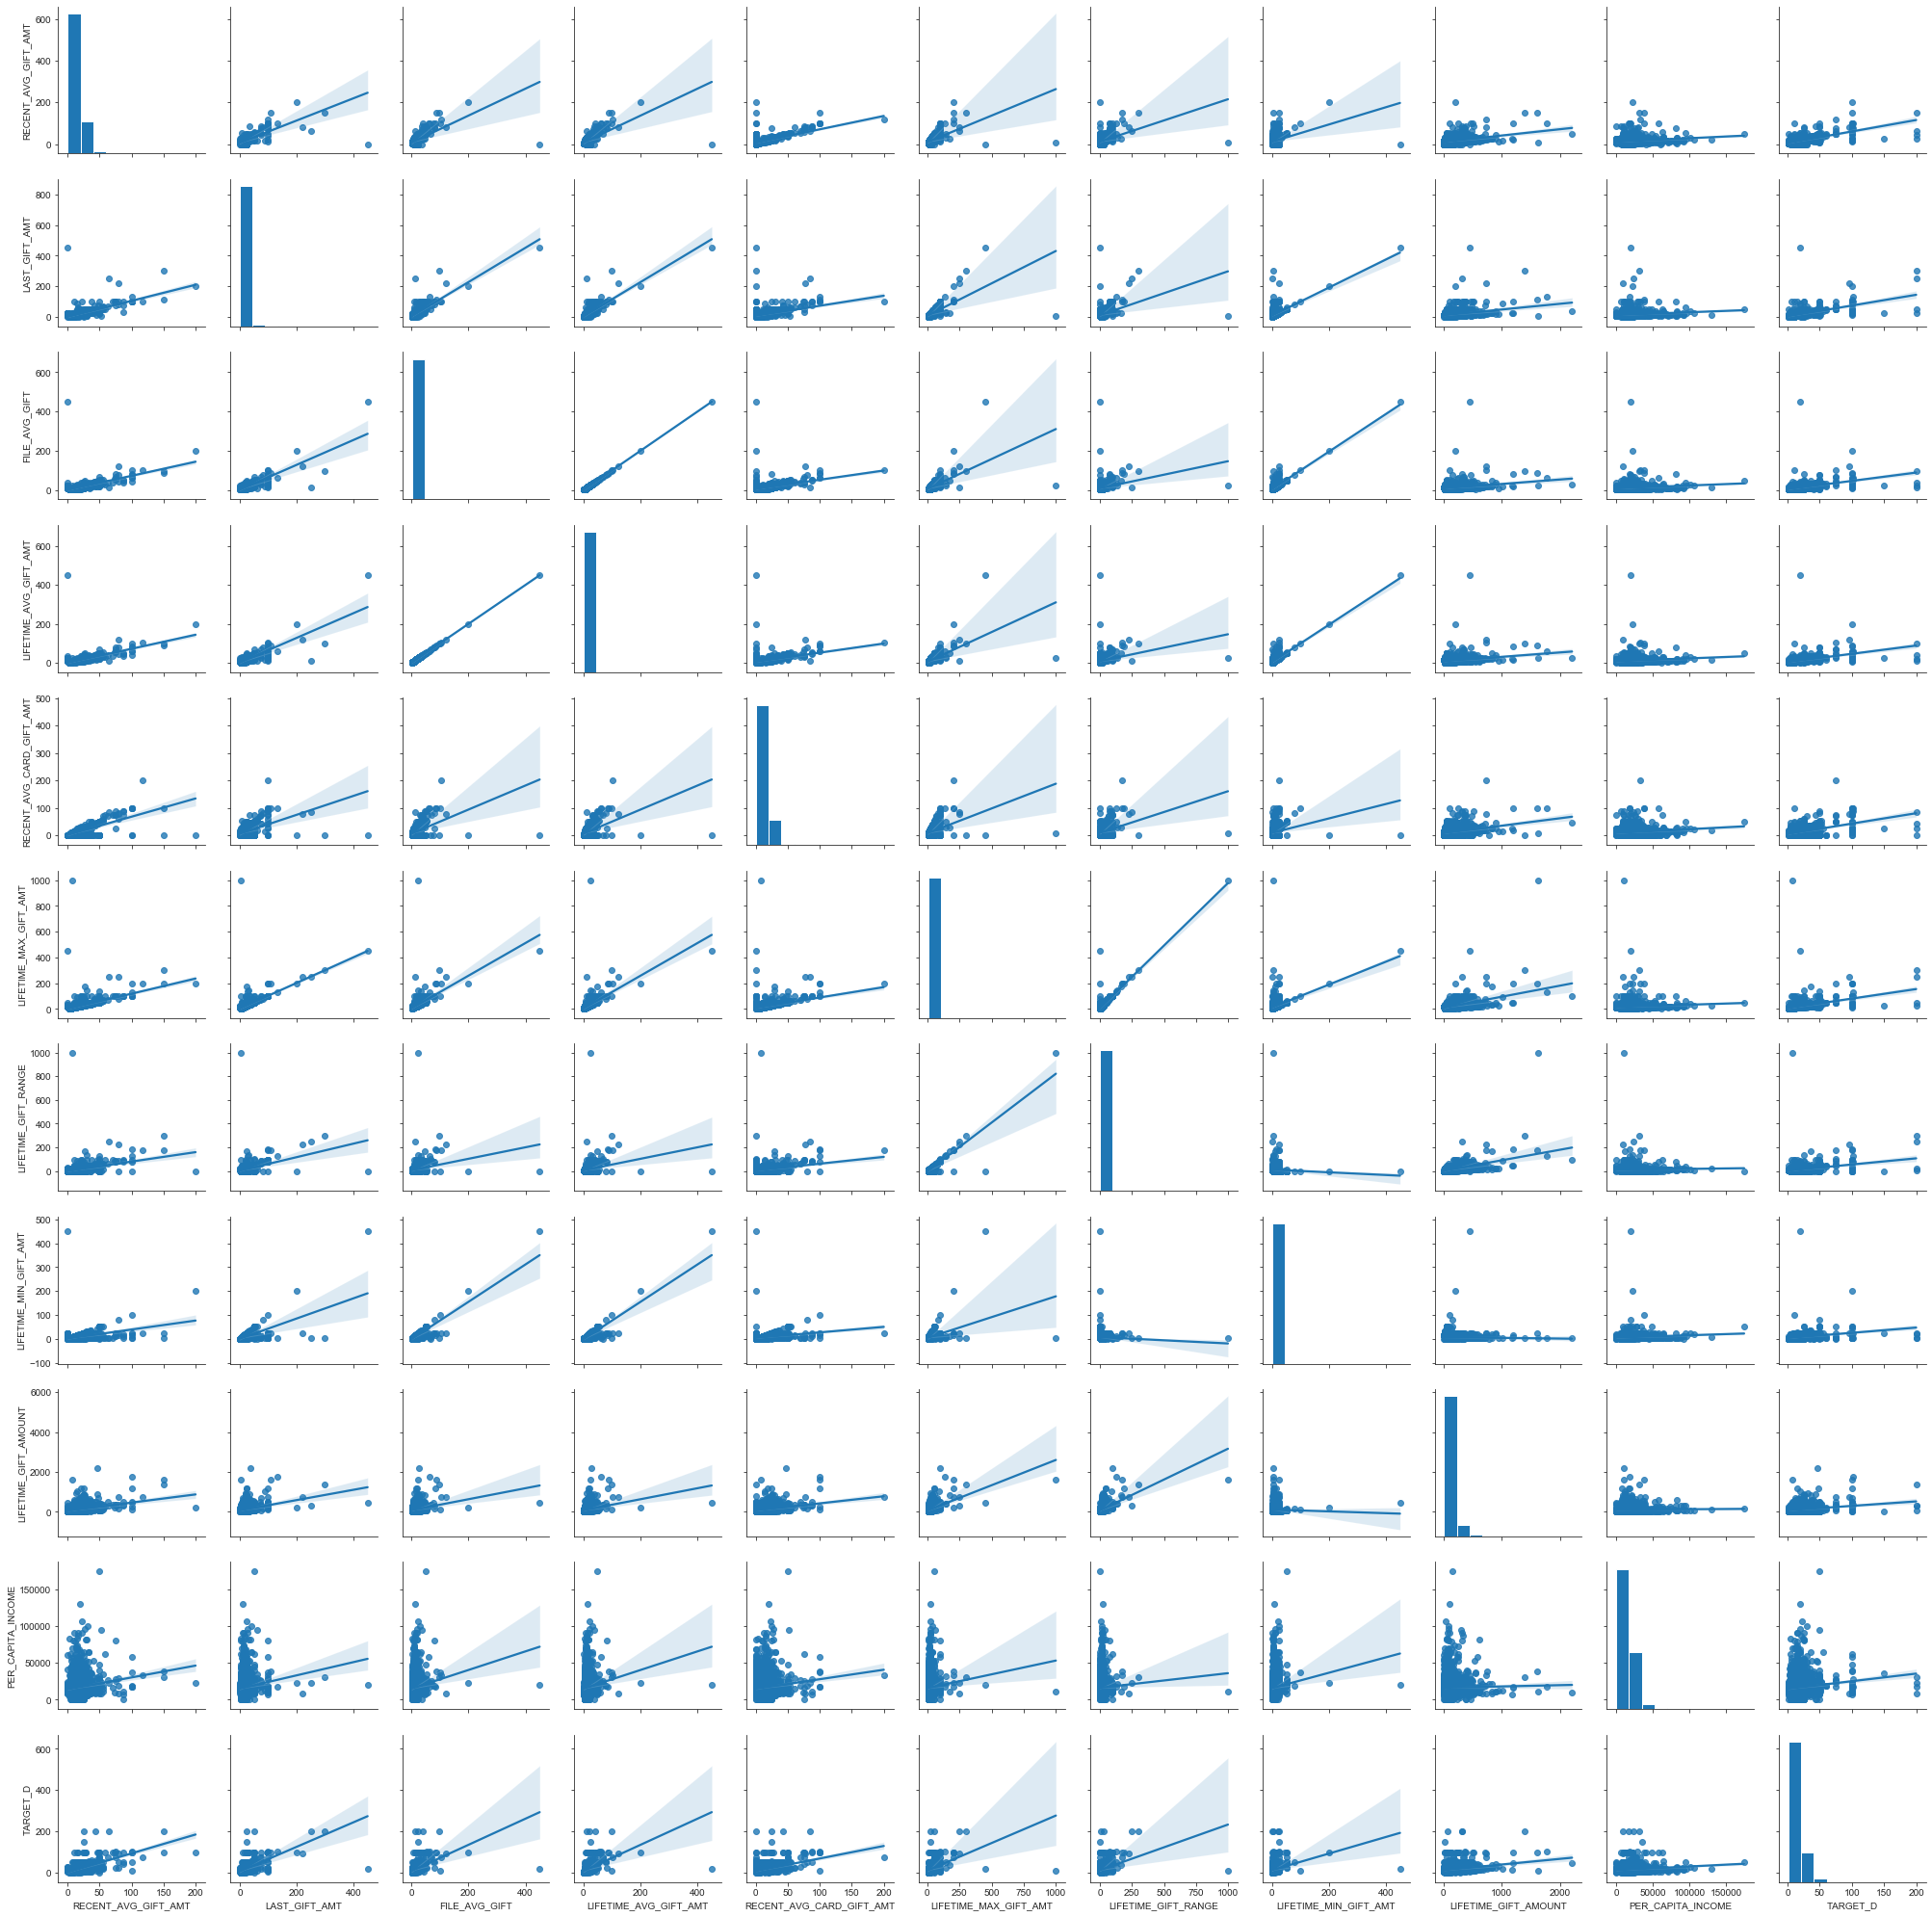

In [48]:
plt.figure(figsize=(20,6))
sns.set_style('white')
sns.set_style('ticks')
sns.pairplot(df_numerical_topten, kind='reg')

From the graph above, we can clearly see that most of the top ten numerical features have strong correlation with the others.

A heat map can be more interactive. Let us plot a heat map between the correlated variables

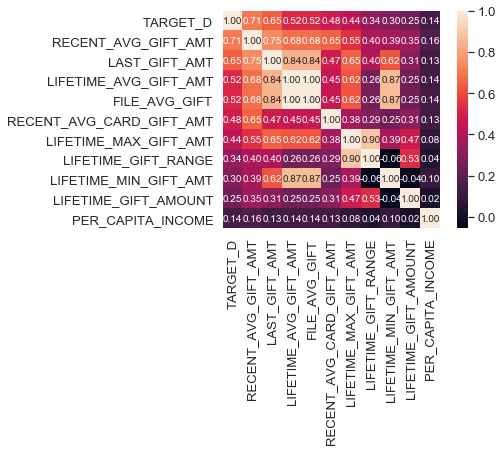

In [49]:
corrmatrix = df_numerical.corr()
k = 11 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'TARGET_D')['TARGET_D'].index
cm = np.corrcoef(df_numerical[cols].values.T)
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

Ah! Heatmap is the best way to get a quick overview of the relationships between varaibles. The correlation between the variables is so strong that it can indicate a situation of multicollinearity.
It is evident that there exists a strong relationship between several variables


Let us explore the strongest correlated variables obtained from Heatmap

<Figure size 864x432 with 0 Axes>

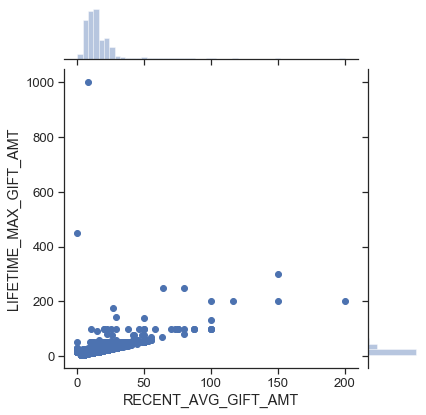

In [50]:
# RECENT_AVG_GIFT_AMT and LIFETIME_MAX_GIFT_AMT
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='RECENT_AVG_GIFT_AMT', y='LIFETIME_MAX_GIFT_AMT', data=df_numerical)
g.set_axis_labels(xlabel='RECENT_AVG_GIFT_AMT', ylabel='LIFETIME_MAX_GIFT_AMT')

<Figure size 864x432 with 0 Axes>

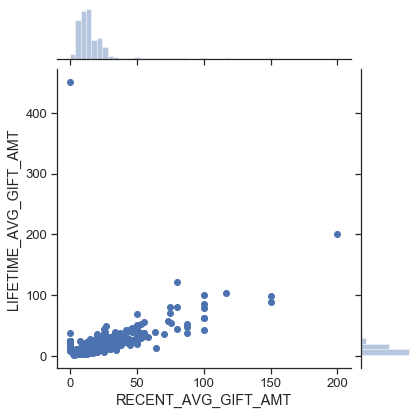

In [51]:
# RECENT_AVG_GIFT_AMT and LIFETIME_AVG_GIFT_AMT
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='RECENT_AVG_GIFT_AMT', y='LIFETIME_AVG_GIFT_AMT', data=df_numerical)
g.set_axis_labels(xlabel='RECENT_AVG_GIFT_AMT', ylabel='LIFETIME_AVG_GIFT_AMT')

<Figure size 864x432 with 0 Axes>

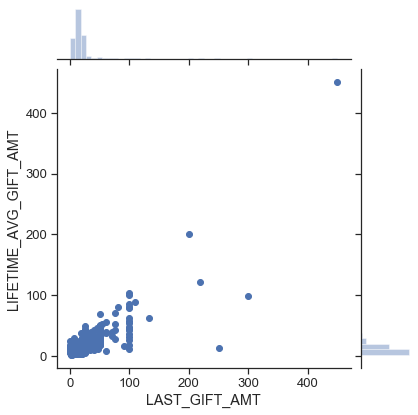

In [52]:
# LAST_GIFT_AMT and LIFETIME_AVG_GIFT_AMT
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='LAST_GIFT_AMT', y='LIFETIME_AVG_GIFT_AMT', data=df_numerical)
g.set_axis_labels(xlabel='LAST_GIFT_AMT', ylabel='LIFETIME_AVG_GIFT_AMT')

<Figure size 864x432 with 0 Axes>

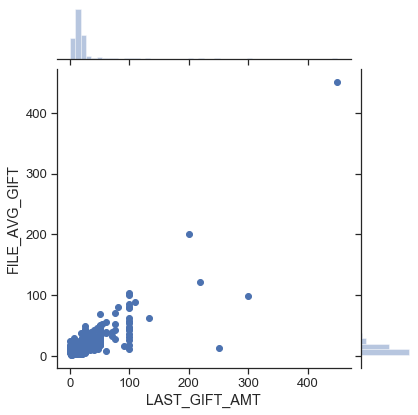

In [53]:
# LAST_GIFT_AMT and FILE_AVG_GIFT
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='LAST_GIFT_AMT', y='FILE_AVG_GIFT', data=df_numerical)
g.set_axis_labels(xlabel='LAST_GIFT_AMT', ylabel='FILE_AVG_GIFT')

<Figure size 864x432 with 0 Axes>

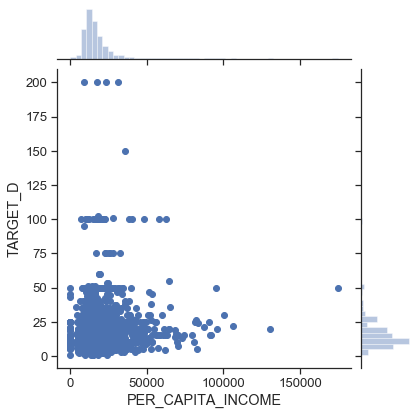

In [54]:
# PER_CAPITA_INCOME and TARGET_D
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='PER_CAPITA_INCOME', y='TARGET_D', data=df_numerical)
g.set_axis_labels(xlabel='PER_CAPITA_INCOME', ylabel='TARGET_D')

<Figure size 864x432 with 0 Axes>

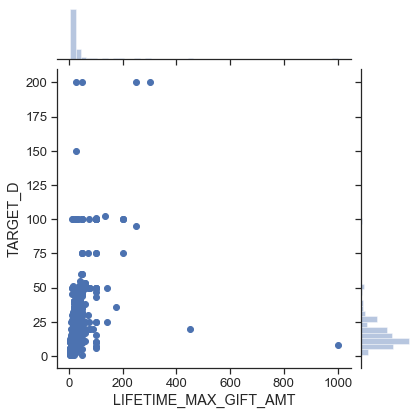

In [55]:
# LIFETIME_MAX_GIFT_AMT and TARGET_D
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='LIFETIME_MAX_GIFT_AMT', y='TARGET_D', data=df_numerical)
g.set_axis_labels(xlabel='LIFETIME_MAX_GIFT_AMT', ylabel='TARGET_D')

<Figure size 864x432 with 0 Axes>

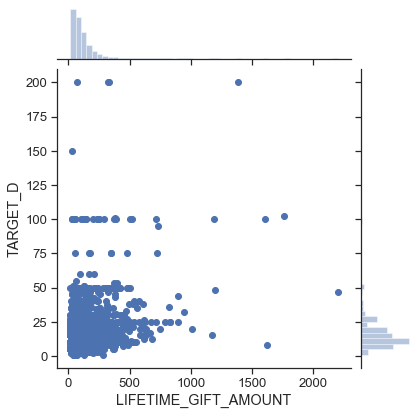

In [56]:
# LIFETIME_GIFT_AMOUNT and TARGET_D
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='LIFETIME_GIFT_AMOUNT', y='TARGET_D', data=df_numerical)
g.set_axis_labels(xlabel='LIFETIME_GIFT_AMOUNT', ylabel='TARGET_D')

<Figure size 864x432 with 0 Axes>

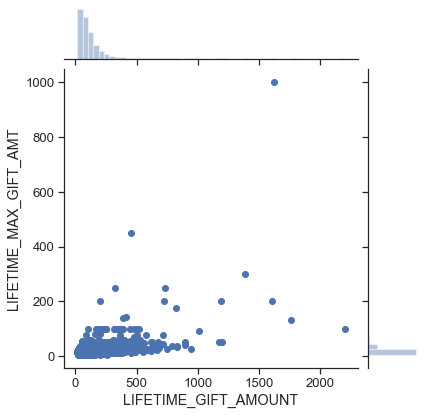

In [57]:
# LIFETIME_GIFT_AMOUNT and LIFETIME_MAX_GIFT_AMT
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='LIFETIME_GIFT_AMOUNT', y='LIFETIME_MAX_GIFT_AMT', data=df_numerical)
g.set_axis_labels(xlabel='LIFETIME_GIFT_AMOUNT', ylabel='LIFETIME_MAX_GIFT_AMT')

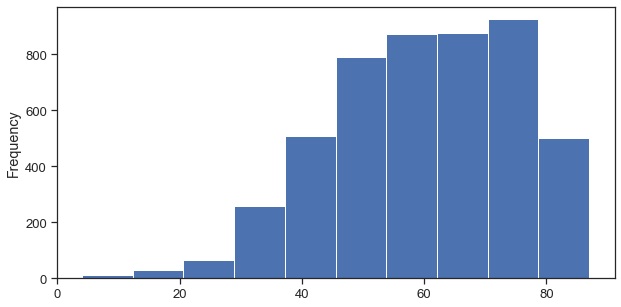

In [58]:
df_numerical['DONOR_AGE'].plot.hist(figsize=(10,5))
# This shows us that most of the donors fall betweeen the ages pf 45 - 75 
# This gives us valuable information o who to target based on age

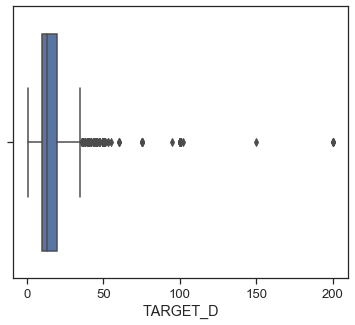

In [59]:
plt.figure(figsize=(6,5))
sns.boxplot(x='TARGET_D', data=df_numerical)

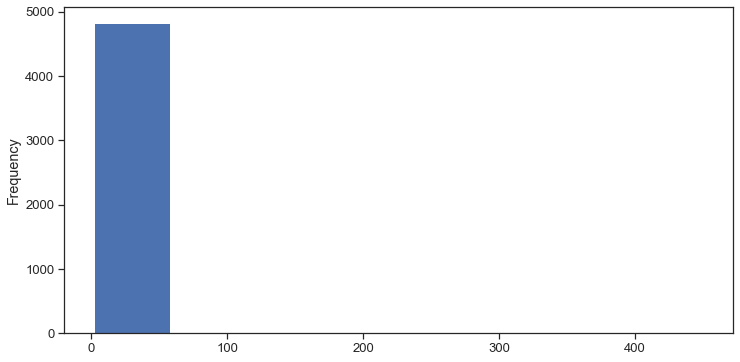

In [60]:
df_numerical['LIFETIME_AVG_GIFT_AMT'].plot.hist(bins=8, figsize=(12,6)) 
#From the graph we can see the that this amount is close to a 100

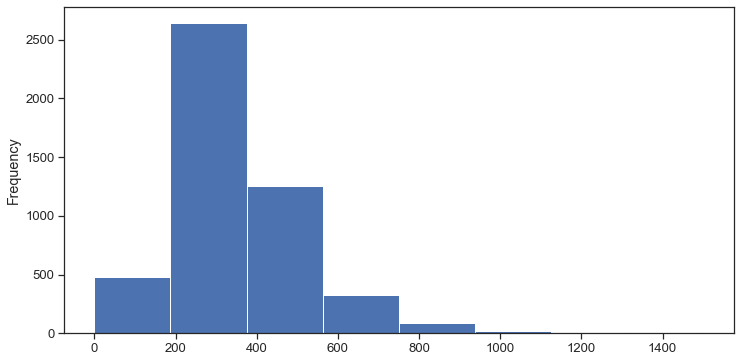

In [61]:
df_numerical['MEDIAN_HOUSEHOLD_INCOME'].plot.hist(bins=8, figsize=(12,6))
# This showS us the median income of households. 


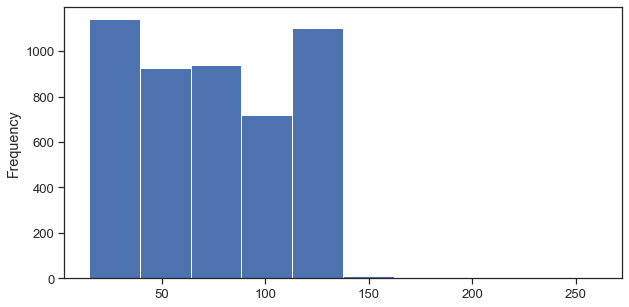

In [62]:
df_numerical['MONTHS_SINCE_FIRST_GIFT'].plot.hist(figsize=(10,5))


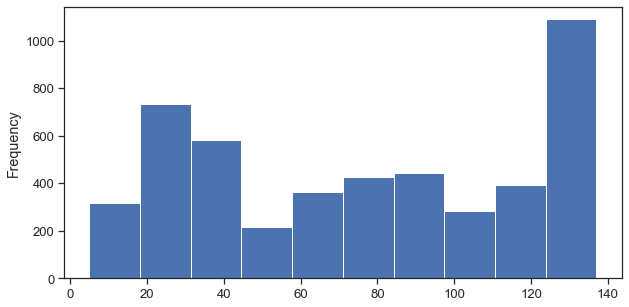

In [63]:
df_numerical['MONTHS_SINCE_ORIGIN'].plot.hist(figsize=(10,5))

### Categorical data - EDA
I would like to explore the relationship between all categorical varibales with the output variable i.e. Amount Donated

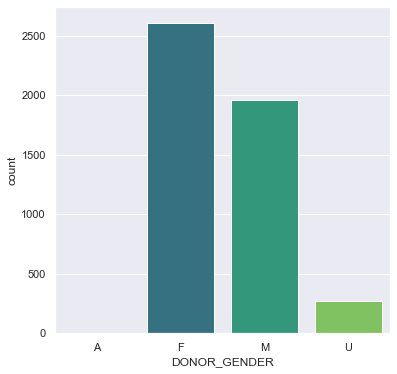

F    2609
M    1962
U     271
A       1
Name: DONOR_GENDER, dtype: int64

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='DONOR_GENDER', data= df_categorical, palette='viridis')
plt.show()

df_categorical['DONOR_GENDER'].value_counts()
# From here we can see the gender distribution in our dataset


Text(0.5, 1.0, 'DONOR GENDER vs Amount')

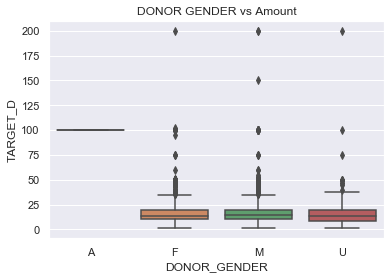

In [65]:
sns.boxplot(x=df_categorical["DONOR_GENDER"], y=df_numerical["TARGET_D"])
plt.title("DONOR GENDER vs Amount")

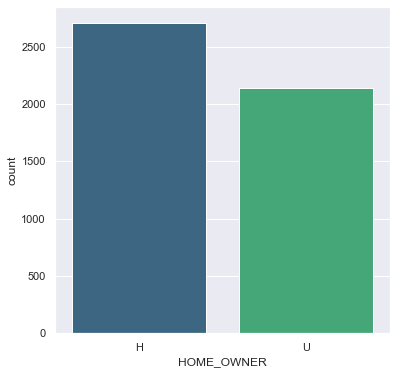

H    2708
U    2135
Name: HOME_OWNER, dtype: int64

In [66]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='HOME_OWNER', data = df_categorical,palette='viridis')
plt.show()

df_categorical['HOME_OWNER'].value_counts()
# From here we can see the home owner distribution in our dataset
# This graph shows us that home ownership is a strong indicator tthat someone will donate

Text(0.5, 1.0, 'HOME_OWNER vs Amount')

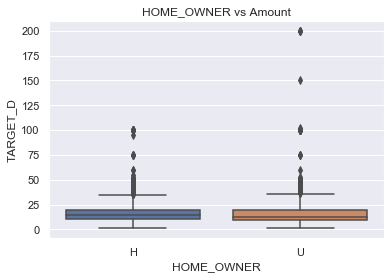

In [67]:
sns.boxplot(x=df_categorical["HOME_OWNER"], y=df_numerical["TARGET_D"])
plt.title("HOME_OWNER vs Amount")

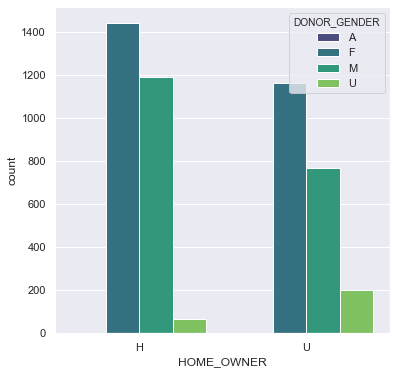

In [68]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='HOME_OWNER', hue='DONOR_GENDER', data=df_categorical, palette='viridis')
plt.show()
# We also found out that on average females own more homes than men

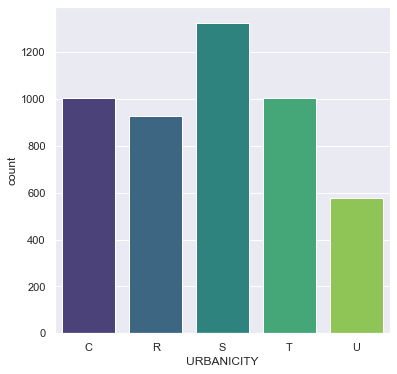

S    1327
T    1006
C    1006
R     927
U     577
Name: URBANICITY, dtype: int64

In [69]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='URBANICITY', data=df_categorical, palette='viridis')
plt.show()

df_categorical['URBANICITY'].value_counts()
# We found out that the people most likely to donate live in suburban areas. 

Text(0.5, 1.0, 'URBANICITY vs Amount')

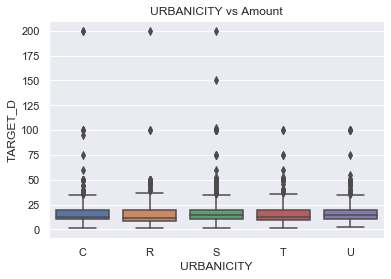

In [70]:
sns.boxplot(x=df_categorical["URBANICITY"], y=df_numerical["TARGET_D"])
plt.title("URBANICITY vs Amount")

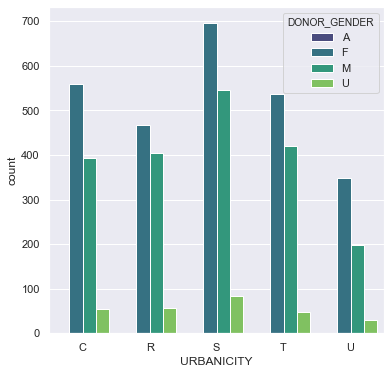

In [71]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='URBANICITY', hue = 'DONOR_GENDER',data=df_categorical, palette='viridis')
plt.show()

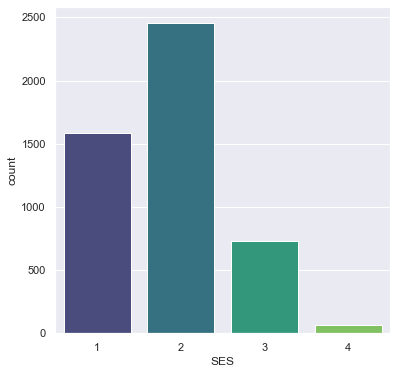

2    2458
1    1583
3     733
4      69
Name: SES, dtype: int64

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='SES', data=df_categorical, palette='viridis')
plt.show()

df_categorical['SES'].value_counts()
# This shows that most of the people likely to donate fall into the 2nd social economic status bracket

Text(0.5, 1.0, 'SES vs Amount')

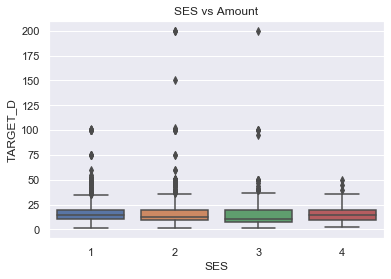

In [73]:
sns.boxplot(x=df_categorical["SES"], y=df_numerical["TARGET_D"])
plt.title("SES vs Amount")

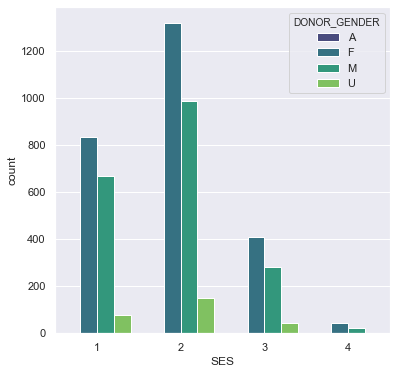

In [74]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='SES', hue = 'DONOR_GENDER', data=df_categorical, palette='viridis')
plt.show()


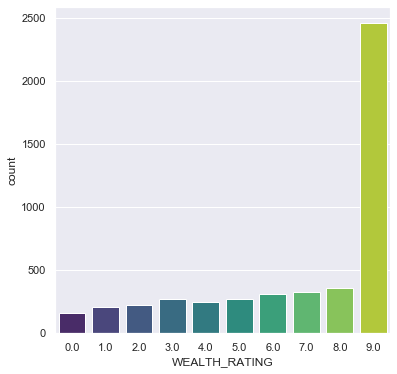

9.0    381
8.0    359
7.0    327
6.0    311
5.0    273
3.0    272
4.0    250
2.0    222
1.0    208
0.0    161
Name: WEALTH_RATING, dtype: int64

In [75]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='WEALTH_RATING', data=df_numerical, palette='viridis')
plt.show()

df['WEALTH_RATING'].value_counts()

Text(0.5, 1.0, 'WEALTH_RATING vs Amount')

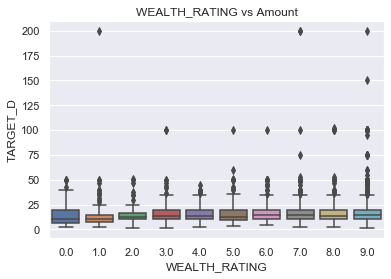

In [76]:
sns.boxplot(x=df_numerical["WEALTH_RATING"], y=df_numerical["TARGET_D"])
plt.title("WEALTH_RATING vs Amount")

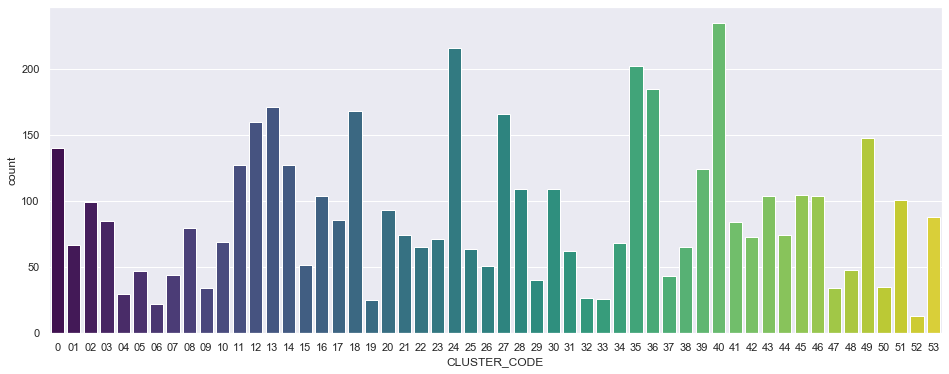

40    235
24    216
35    202
36    185
13    171
18    168
27    166
12    160
49    148
0     140
14    127
11    127
39    124
30    109
28    109
45    105
16    104
43    104
46    104
51    101
02     99
20     93
53     88
17     86
03     85
41     84
08     80
21     74
44     74
42     73
23     71
10     69
34     68
01     67
22     65
38     65
25     64
31     62
15     52
26     51
48     48
05     47
07     44
37     43
29     40
50     35
47     34
09     34
04     30
32     27
33     26
19     25
06     22
52     13
Name: CLUSTER_CODE, dtype: int64

In [77]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
sns.countplot(x='CLUSTER_CODE', data=df_categorical, palette='viridis')
plt.show()

df_categorical['CLUSTER_CODE'].value_counts()

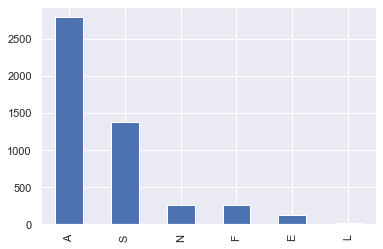

In [78]:
df_categorical.RECENCY_STATUS_96NK.value_counts().plot(kind='bar')
plt.show()

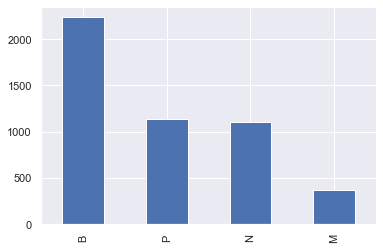

In [79]:
df_categorical.OVERLAY_SOURCE.value_counts().plot(kind='bar')
plt.show()

In [80]:
dff[[ 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'INCOME_GROUP',
       'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT']] = StandardScaler().fit_transform(dff[[ 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'INCOME_GROUP',
       'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT']])

In [81]:
dff.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
1,1,10.0,12,1.439201,1.264618,-0.317698,R,2,45,H,...,0.449460,0.329213,-0.190874,0.135377,1.080581,1.470577,-2.480619,1.285401,0.284133,1.202829
7,1,5.0,67,0.270367,1.264618,-0.317698,C,2,28,H,...,-0.388841,-0.539330,-0.408300,-0.751838,2.477045,2.037872,-2.010960,0.458518,-0.668870,0.385157
9,1,16.0,71,0.562575,0.197357,-0.317698,R,2,43,H,...,-0.179266,-0.346320,-0.408300,-0.530034,3.873510,2.605167,-2.010960,0.458518,-0.494432,1.407247
14,1,3.0,142,1.439201,0.797691,-0.317698,R,2,43,U,...,-0.126872,-0.346320,-0.517013,-0.382165,2.477045,1.659676,1.041822,1.472116,-0.575245,1.611665
16,1,12.0,159,-0.021842,1.398026,-0.317698,R,2,45,U,...,-0.074478,-0.153311,-0.190874,-0.012492,3.873510,2.983363,-2.715449,0.405171,-0.249037,0.180739


#### Encode the categorical data
To perform Regression Analysis all the data should be in numerical form. Since our data frame contains categorical data too, this should be converted into numerical for further analysis. 

In [82]:
# start with URBANICITY. 
dff['URBANICITY'] = dff['URBANICITY'].astype('category')
#I change the data type to category so I can use cat.codes on the URBANICITY column

In [83]:
dff['URBANICITY'] = dff['URBANICITY'].cat.codes
# here I use label encoding to handle the categorical data that is the column URBANICITY

In [84]:
#DO THE SAME FOR OVERLAY_SOURCE
dff['OVERLAY_SOURCE'] = dff['OVERLAY_SOURCE'].astype('category')
dff['OVERLAY_SOURCE'] = dff['OVERLAY_SOURCE'].cat.codes

In [85]:
#DO THE SAME FOR HOME_OWNER
dff['HOME_OWNER'] = dff['HOME_OWNER'].astype('category')
dff['HOME_OWNER'] = dff['HOME_OWNER'].cat.codes

In [86]:
#DO FOR RECENECY_STATUS_96NK
dff['RECENCY_STATUS_96NK'] = dff['RECENCY_STATUS_96NK'].astype('category')
dff['RECENCY_STATUS_96NK'] = dff['RECENCY_STATUS_96NK'].cat.codes

In [87]:
# change the CLUSTER_CODE data format to numeric before feature selection
dff['CLUSTER_CODE'] = pd.to_numeric(dff['CLUSTER_CODE'], errors='coerce')

In [88]:
df_categorical.columns

Index(['URBANICITY', 'SES', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER',
       'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK'],
      dtype='object')

In [89]:
# Used get_dummies to produce binary matrix dummy variables 
new_df = pd.get_dummies(dff, columns=[ 'DONOR_GENDER'])

In [90]:
new_df.drop(['DONOR_GENDER_A','DONOR_GENDER_U'],axis=1, inplace=True)

In [91]:
new_df.shape

(4843, 51)

In [92]:
new_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'OVERLAY_SOURCE',
       'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
     

In [93]:
new_df.dtypes

TARGET_B                         int64
TARGET_D                       float64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN            float64
DONOR_AGE                      float64
IN_HOUSE                       float64
URBANICITY                        int8
SES                             object
CLUSTER_CODE                     int64
HOME_OWNER                        int8
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                    int8
MOR_HIT_RATE                   float64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE              float64
MEDIAN_HOUSEHOLD_INCOME        float64
PCT_OWNER_OCCUPIED             float64
PER_CAPITA_INCOME              float64
PCT_ATTRIBUTE1                 float64
PCT_ATTRIBUTE2                 float64
PCT_ATTRIBUTE3                 float64
PCT_ATTRIBUTE4                 float64
PEP_STAR                       float64
RECENT_STAR_STATUS             float64
RECENCY_STATUS_96NK      

In [94]:
new_df.isnull().values.any()

False

In [95]:
# Create a new data frame house_prices_new_numerical which contains columns that are of type numerical 
new_numerical = dff.select_dtypes(include = [np.number])

#### Split the data into test and train data sets
It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.



### MODEL BUILDING

In [96]:
X = new_df.drop(['TARGET_B', 'TARGET_D', 'SES'], axis = 1)

In [97]:
y = new_df['TARGET_D']

In [98]:
X.shape

(4843, 48)

In [99]:
y.shape

(4843,)

In [100]:
X.dtypes

CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN            float64
DONOR_AGE                      float64
IN_HOUSE                       float64
URBANICITY                        int8
CLUSTER_CODE                     int64
HOME_OWNER                        int8
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                    int8
MOR_HIT_RATE                   float64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE              float64
MEDIAN_HOUSEHOLD_INCOME        float64
PCT_OWNER_OCCUPIED             float64
PER_CAPITA_INCOME              float64
PCT_ATTRIBUTE1                 float64
PCT_ATTRIBUTE2                 float64
PCT_ATTRIBUTE3                 float64
PCT_ATTRIBUTE4                 float64
PEP_STAR                       float64
RECENT_STAR_STATUS             float64
RECENCY_STATUS_96NK               int8
FREQUENCY_STATUS_97NK          float64
RECENT_RESPONSE_PROP           float64
RECENT_AVG_GIFT_AMT      

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 48)
(1453, 48)
(3390,)
(1453,)


In [103]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
import statsmodels.api as sm

In [105]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               TARGET_D   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              460.7
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                        0.00
Time:                        07:35:55   Log-Likelihood:                         -17283.
No. Observations:                4843   AIC:                                  3.466e+04
Df Residuals:                    4797   BIC:                                  3.496e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
CONTROL_NUMBER               1.948e-05   2.37e-06      8.225      0.000    1.48e-05    2.41e-05
MONTHS_SINCE_ORIGIN             0.7127      0.765      0.932      0.351      -0.787       2.212
DONOR_AGE                       0.0419      0.131      0.319      0.750      -0.215       0.299
IN_HOUSE                       -0.1702      0.171     -0.998      0.318      -0.505       0.164
URBANICITY                      0.7856      0.098      7.996      0.000       0.593       0.978
CLUSTER_CODE                    0.0788      0.010      8.026      0.000       0.060       0.098
HOME_OWNER                      1.5696      0.270      5.807      0.000       1.040       2.099
INCOME_GROUP                    0.2583      0.138      1.866      0.062      -0.013       0.530
PUBLISHED_PHONE                 2.1418      0.285      7.523      0.000       1.584       2.700
OVERLAY_SOURCE                  0.7121      0.119      5.969      0.000       0.478       0.946
MOR_HIT_RATE                    0.0065      0.134      0.048      0.961      -0.256       0.269
WEALTH_RATING                   0.3579      0.157      2.282      0.023       0.050       0.665
MEDIAN_HOME_VALUE              -0.5857      0.217     -2.695      0.007      -1.012      -0.160
MEDIAN_HOUSEHOLD_INCOME         0.5738      0.303      1.896      0.058      -0.020       1.167
PCT_OWNER_OCCUPIED             -0.3652      0.170     -2.150      0.032      -0.698      -0.032
PER_CAPITA_INCOME               0.3855      0.258      1.493      0.135      -0.121       0.892
PCT_ATTRIBUTE1                  0.0190      0.128      0.149      0.882      -0.231       0.269
PCT_ATTRIBUTE2                  0.0799      0.157      0.508      0.611      -0.228       0.388
PCT_ATTRIBUTE3                 -0.3979      0.151     -2.641      0.008      -0.693      -0.103
PCT_ATTRIBUTE4                 -0.2663      0.171     -1.557      0.120      -0.602       0.069
PEP_STAR                       -0.4102      0.174     -2.355      0.019      -0.752      -0.069
RECENT_STAR_STATUS             -0.2073      0.144     -1.441      0.150      -0.489       0.075
RECENCY_STATUS_96NK             0.2681      0.067      3.983      0.000       0.136       0.400
FREQUENCY_STATUS_97NK          -1.3882      0.221     -6.295      0.000      -1.820      -0.956
RECENT_RESPONSE_PROP            0.4754      0.439      1.082      0.279      -0.386       1.337
RECENT_AVG_GIFT_AMT             4.9312      0.259     19.052      0.000       4.424       5.439
RECENT_CARD_RESPONSE_PROP      -0.8295      0.435     -1.908      0.056      -1.682       0.023
RECENT_AVG_CARD_GIFT_AMT        0.6132      0.188      3.270      0.001       0.246       0.981
RECENT_R

In [106]:
# Features and their respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,5.116348
39,LAST_GIFT_AMT,3.951301
33,LIFETIME_GIFT_AMOUNT,1.692376
1,MONTHS_SINCE_ORIGIN,1.131727
27,RECENT_AVG_CARD_GIFT_AMT,0.745663
6,HOME_OWNER,0.695747
31,LIFETIME_CARD_PROM,0.561119
8,PUBLISHED_PHONE,0.533225
42,MONTHS_SINCE_LAST_GIFT,0.506080
13,MEDIAN_HOUSEHOLD_INCOME,0.396490


In [107]:
pos_coeffs_df= coeffs_df[(coeffs_df['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_df

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,5.116348
39,LAST_GIFT_AMT,3.951301
33,LIFETIME_GIFT_AMOUNT,1.692376
1,MONTHS_SINCE_ORIGIN,1.131727
27,RECENT_AVG_CARD_GIFT_AMT,0.745663
6,HOME_OWNER,0.695747
31,LIFETIME_CARD_PROM,0.561119
8,PUBLISHED_PHONE,0.533225
42,MONTHS_SINCE_LAST_GIFT,0.506080
13,MEDIAN_HOUSEHOLD_INCOME,0.396490


In [108]:
neg_coeffs_df = coeffs_df[(coeffs_df['Estimated_Coefficients'] < 0)].sort_values(by='Estimated_Coefficients', ascending = True)
neg_coeffs_df

,Features,Estimated_Coefficients
43,MONTHS_SINCE_FIRST_GIFT,-2.379264
46,DONOR_GENDER_F,-1.386870
23,FREQUENCY_STATUS_97NK,-0.982864
38,LIFETIME_MIN_GIFT_AMT,-0.866426
32,LIFETIME_PROM,-0.796638
34,LIFETIME_GIFT_COUNT,-0.725169
26,RECENT_CARD_RESPONSE_PROP,-0.698864
35,LIFETIME_AVG_GIFT_AMT,-0.676333
44,FILE_AVG_GIFT,-0.676333
28,RECENT_RESPONSE_COUNT,-0.652633


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

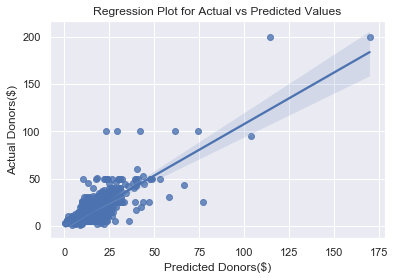

In [109]:
g = sns.regplot(x=lm.predict(X_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted Donors($)', ylabel='Actual Donors($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

From the graph above the model seems to be a good fit for the data, except for a few outliers in the houses highly priced.

Let us calcualte $R^2$ and RMSE (Root Mean Square Error) for the train and test sets to further assess the model.

$R^2$: It is the percentage of the response variable variation that is explained by a linear model

RMSE: It is the square root of the mean of squared errors. Squared errors are the difference of actual and predicted values sqaured.

In [110]:
# R2 for train and test data
R2_reg_train = lm.score(X_train,y_train)
R2_reg_test = lm.score(X_test,y_test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.515
R squared for test data is: 0.663


The train set explains more variance than the test set. This is quite common because the model is trained on training data, training set's $R^2$ is always greater than the test set's $R^2$.
Since the train score is more than test score, let us see if it is a case of Overfitting by plotting a Residual Plot

In [111]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((y_train - lm.predict(X_train))**2))
RMSE_reg_test = sqrt(np.mean((y_test - lm.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 8.627
Root mean sqaured error for test data is: 7.291


Text(0.5, 1.0, 'Residual Plot using train data')

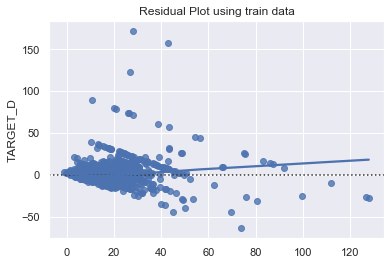

In [112]:
sns.residplot(x=lm.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot using train data')


Residual plot for the training data shows that the data points lie between '-$50' - '$50'

Text(0.5, 1.0, 'Residual Plot using test data')

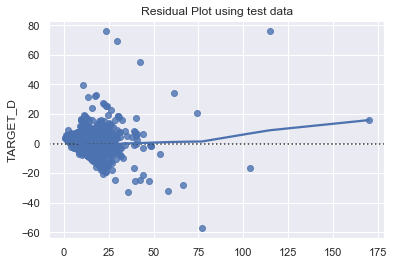

In [113]:
sns.residplot(x=lm.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot using test data')

test data is also showing the same range from the reference line.

Text(0, 0.5, 'Residuals')

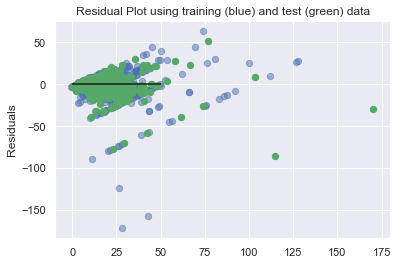

In [114]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

#### The blue dots represent train data and grren dots represent test data. From the residual plot above it is evident that the model is a good fit for test data as well. The data lies between +/- \$50 from the reference line.






Analysis:

The regression line appears to be a good fit for the data.
The train and test scores not being too different form each other, indiactes that there is no Overfitting.
The distribution of test and train data looks similar in the residual plot, which says that there is no big difference in residuals. And the data is spread around -50 and 50.


#### Regularization
With as many as 48 features in the model it is natural for the model to get quite complex. The model sticks too much to the data and the model has probably learned the background noise which results in high variance while being fit, which leads to Overfitting. This results in poor prediction and generalization power when applied o data outside the training set. To overcome this problem regularization technique is used.

To find the best model, the common method in machine learning is to define a loss or cost function that describes how well the model fits the data. The goal is to find the model that minimzes this loss function. The idea is to penalize this loss function by adding a complexity term that would give a bigger loss for more complex models.

Regularization allows to shrink the coefficients to zero by introducing a tuning parameter 'lambda' or 'alpha'. This ensures:

Shrinking of parameters, therefore it is mostly used to prevent multicollinearity.
Reduces the model complexity by coefficient shrinkage.
The two popular methods used to regularize parameters are:

Ridge Regression
Lasso Regression
Ridge Regression: Ridge regression uses L2 penalty to penalize coefficients. L2 penalty is the penalty equivalent to square of the magnitude of coefficients

Lasso Regression: Lasso regression uses L1 penalty which is the absolute value of the magnitude of coefficients

Let us apply Ridge and Lasso models to our data



#### 1. Ridge Regression

In [115]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for RidgeCV
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
# Fit the model to our training data
ridge_reg.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e+00,
       5.e+00, 1.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

Let us calculate the $R^2$ on both train and test sets to assess the performance of our model.

In [116]:
# R2 for train and test data respectively
R2_ridge_train = (ridge_reg.score(X_train, y_train))
R2_ridge_test = (ridge_reg.score(X_test,y_test))
print('R squared for train data is: %.3f' %(R2_ridge_train))
print('R squared for test data is: %.3f' %(R2_ridge_test))

R squared for train data is: 0.515
R squared for test data is: 0.662


The train set explains obtained an $R^2$ of 0.898 and test set got an $R^2$ of 0.887.
There is very little difference between train and test set, this signifies that the model is a good fit for data.

Let us calculate the RMSE values for train and test data sets

In [117]:
RMSE_ridge_train = sqrt(np.mean((y_train - ridge_reg.predict(X_train))**2))
RMSE_ridge_test = sqrt(np.mean((y_test - ridge_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_test))

Root mean squared error for train data is: 8.628
Root mean sqaured error for test data is: 7.299


Let us see the best alpha parameter for Ridge Regression

In [118]:
alpha_ridge_cv = ridge_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_ridge_cv))

The estimated best regularization parameter is: 10.0


#### Regression Plot

Let us draw a regression plot between the actual and predicted house prices to see how well the regresssion line fits tha data.

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

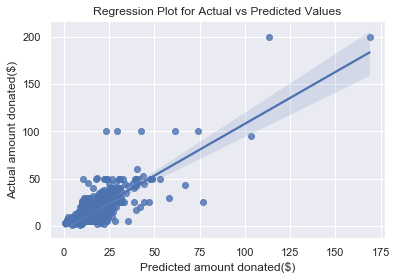

In [119]:
# Regression plot between actual and predicted prices 
g = sns.regplot(x=ridge_reg.predict(X_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted amount donated($)', ylabel='Actual amount donated($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

The regression line looks like a good fit to the data, except for a few outliers in the higher house price range.

#### Residual Plots



To drill down further let us plot some residual plots which helps giving better idea about the data. I decided to plot residual plots for train and test data seperately and another plot depicting train and test data points to get a better visual on data.



#### Residual Plot - Train data

Text(0.5, 1.0, 'Residual Plot for train data')

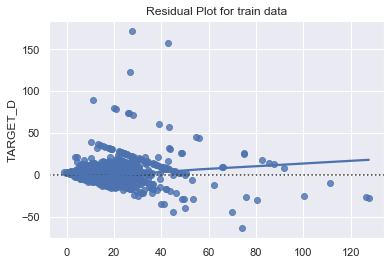

In [120]:
sns.residplot(x=ridge_reg.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot for train data')

The data seems to be close to the reference line (at 0). The data is spread around $-50 to $50 which is quite normal.

Residual Plot - Test data

Text(0.5, 1.0, 'Residual Plot for test data')

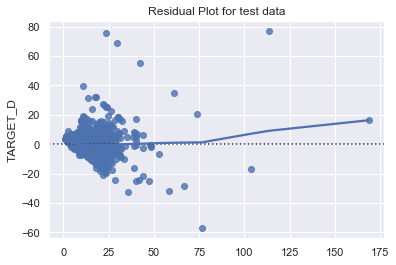

In [121]:
sns.residplot(x=ridge_reg.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot for test data')

The residual plot for test data looks similar to the train data which is a good sign. We can see that the major percent of data lies within the $-20 and $20 range which is the same as train data. Except for that there are a few outliers which is natural when the model is exposed to data outside the training data set.

##### Residual Plot - Train and Test data

Text(0, 0.5, 'Residuals')

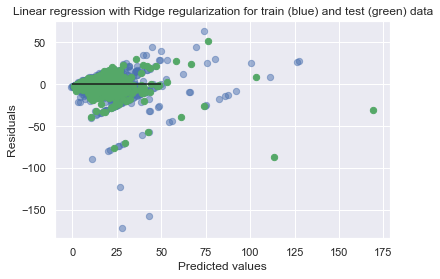

In [122]:
plt.scatter(ridge_reg.predict(X_train), ridge_reg.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge_reg.predict(X_test), ridge_reg.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

The residual plot clearly explians how similar the train and test data are in the graph. This tells that the model provides good results on the test data too.

Let us look at the features and thier respective coefficients to know which features have positive and negative correlation with the target variable 'AMOUNT DONATED'

In [123]:
# Features and thier respective coefficients
ridge_coeffs_df = pd.DataFrame(list(zip(X.columns, ridge_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
ridge_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,5.088678
39,LAST_GIFT_AMT,3.876328
33,LIFETIME_GIFT_AMOUNT,1.654898
1,MONTHS_SINCE_ORIGIN,0.852287
27,RECENT_AVG_CARD_GIFT_AMT,0.759213
6,HOME_OWNER,0.693824
8,PUBLISHED_PHONE,0.525480
42,MONTHS_SINCE_LAST_GIFT,0.501846
31,LIFETIME_CARD_PROM,0.464465
13,MEDIAN_HOUSEHOLD_INCOME,0.387826


Let us look a the positive and negative coefficients seperately

In [124]:
ridge_pos_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
ridge_pos_coeffs_df

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,5.088678
39,LAST_GIFT_AMT,3.876328
33,LIFETIME_GIFT_AMOUNT,1.654898
1,MONTHS_SINCE_ORIGIN,0.852287
27,RECENT_AVG_CARD_GIFT_AMT,0.759213
6,HOME_OWNER,0.693824
8,PUBLISHED_PHONE,0.525480
42,MONTHS_SINCE_LAST_GIFT,0.501846
31,LIFETIME_CARD_PROM,0.464465
13,MEDIAN_HOUSEHOLD_INCOME,0.387826


Let us look at the top five important coefficients having linear correlation with the target variable 'AMOUNT PRICE'.


In [125]:
ridge_neg_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients',ascending = True)
ridge_neg_coeffs_df

,Features,Estimated_Coefficients
43,MONTHS_SINCE_FIRST_GIFT,-2.066503
46,DONOR_GENDER_F,-1.297509
23,FREQUENCY_STATUS_97NK,-0.989841
38,LIFETIME_MIN_GIFT_AMT,-0.909135
34,LIFETIME_GIFT_COUNT,-0.730642
32,LIFETIME_PROM,-0.709771
26,RECENT_CARD_RESPONSE_PROP,-0.652914
35,LIFETIME_AVG_GIFT_AMT,-0.613558
44,FILE_AVG_GIFT,-0.613558
28,RECENT_RESPONSE_COUNT,-0.590178


Now let us look at the negative coefficients. 

#### Cross Validation

When evaluating different hyperparameters for estimators, such as the alpha is this setting that must be manually set for an Ridge, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.Even though the model is trained exclusively on the training data, we are optimizing hyperparameters based on the test set. As such, estimate of performance can be optimistic, because we are essentially reporting best-case results.

Another way to deal with this is through cross-validation (CV). In CV a test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. A model is trained using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

#### GridSearchCV

Let us explore the best hyper parameter (alpha) and it's respective score using GridSearchCV

In [126]:
# Create an object of type Ridge()
ridge = Ridge()
# Fit the model on the trainng data.
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square

In [127]:
# Import library to find out score (R2)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'r2')

# Fit the training model 
ridge_grid.fit(X_train, y_train)

# Get the best alpha value and it's respective R2 score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],r2_score(ridge_grid.predict(X_test), y_test)))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.46551e-26): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.53922e-27): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.75342e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.87738e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.97618e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/a

Best alpha value is: 10
Accuracy from alpha = 10: 0.3948796678334918 



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.31523e-17): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.5027e-17): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.24494e-17): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.24281e-17): result may not be accurate.
  overwrite_a=True).T


Let us compare the R2 scores for train and test data using GridSearchCV

In [128]:
R2_ridge_grid_train = r2_score(ridge_grid.predict(X_train), y_train)
R2_ridge_grid_test = r2_score(ridge_grid.predict(X_test), y_test)
print('R squared for train data is: %.3f' %(R2_ridge_grid_train))
print('R squared for test data is: %.3f' %(R2_ridge_grid_test))

R squared for train data is: 0.056
R squared for test data is: 0.395


#### Let us repeat the same process to find out RMSE values for train and test data sets

In [129]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'neg_mean_squared_error')

# Fit the training model 
ridge_grid.fit(X_train, y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(ridge_grid.predict(X_test), y_test))))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.46551e-26): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.53922e-27): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.75342e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.87738e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.97618e-24): result may not be accurate.
  overwrite_a=True).T
/Applications/a

Best alpha value is: 10
Accuracy from alpha = 10: 7.298764252865091 



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.5027e-17): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.24494e-17): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.24281e-17): result may not be accurate.
  overwrite_a=True).T


Let us compare the RMSE scores for train and test data using GridSearchCV

In [130]:
RMSE_ridge_grid_train = sqrt(mean_squared_error(ridge_grid.predict(X_train), y_train))
RMSE_ridge_grid_test = sqrt(mean_squared_error(ridge_grid.predict(X_test), y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_grid_test))

Root mean squared error for train data is: 8.628
Root mean sqaured error for test data is: 7.299


We can conclude that the best alpha value is 10 for Ridge Regression

### 2. Lasso Regression

In [131]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for LassoCV
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
# Fit the model to our training data
lasso_reg.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92700.06321487036, tolerance: 38844.64056564898
  tol, rng, random, positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111496.16419614911, tolerance: 44073.05241804942
  tol, rng, random, positive)


LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='random', tol=0.1,
        verbose=False)

Let us calculate the $R^2$ on both train and test sets to assess the performance of our model.

In [132]:
# R2 for train and test data respectively
R2_train = (lasso_reg.score(X_train, y_train))
R2_test = (lasso_reg.score(X_test,y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))

R squared for train data is: 0.477
R squared for test data is: 0.580


The train set explains obtained an $R^2$ of 0.91 and test set got an $R^2$ of 0.86.
There is not a huge difference between train and test set, this signifies that the model is a good fit for data, because it performed well when exposed outside of the training data .

#### Now let us calculate the RMSE scores for train and test data sets

In [133]:
RMSE_train = sqrt(np.mean((y_train - lasso_reg.predict(X_train))**2))
RMSE_test = sqrt(np.mean((y_test - lasso_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))

Root mean squared error for train data is: 8.960
Root mean sqaured error for test data is: 8.143


In [134]:
alpha_lasso_cv = lasso_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_lasso_cv))

The estimated best regularization parameter is: 1.0


#### Regression Plot

Let us plot a regression plot to see how good of a fit is our regression line on the data

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

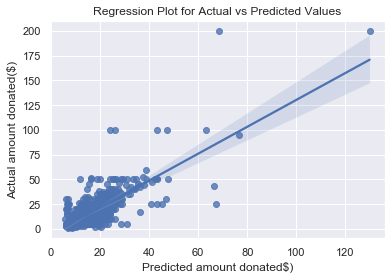

In [135]:
# Regression plot
g = sns.regplot(x=lasso_reg.predict(X_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted amount donated$)', ylabel='Actual amount donated($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

It is quite evident that the regression line is a good fit to our data.



#### Residual Plots

I plotted residual graphs for train, test seperatley and together using lasso regression.

Text(0.5, 1.0, 'Residual Plot for train data')

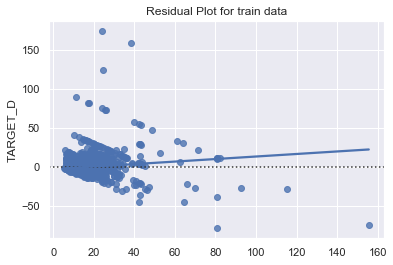

In [136]:
sns.residplot(x=lasso_reg.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot for train data')

The graph looks very much similar to what was produced by Linear Regression and Ridge Regression. The data lies within the -50 to +50 range where most of the data lies close to the reference line.

Text(0.5, 1.0, 'Residual Plot for test data')

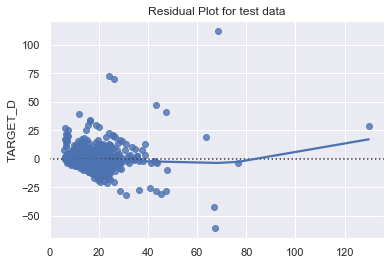

In [137]:
sns.residplot(x=lasso_reg.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot for test data')

The data points are scattered around the reference line. There are few outliers, but most of the data lies with the expected -20 to +20 range.

Text(0, 0.5, 'Residuals')

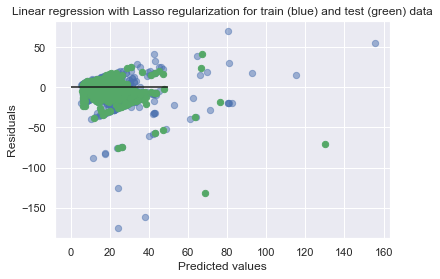

In [138]:
plt.scatter(lasso_reg.predict(X_train), lasso_reg.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lasso_reg.predict(X_test), lasso_reg.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Lasso regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

From the graph the train and test data points are close to each other indicating that the model is performing well on the test data too.

Let us see what coefficients does lasso regression produce and what are the top features that influence amount donated.

In [139]:
# Features and thier respective coefficients
lasso_coeffs_df = pd.DataFrame(list(zip(X.columns, lasso_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
lasso_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,6.404441
39,LAST_GIFT_AMT,1.077334
44,FILE_AVG_GIFT,0.104084
27,RECENT_AVG_CARD_GIFT_AMT,0.012008
0,CONTROL_NUMBER,0.000001
43,MONTHS_SINCE_FIRST_GIFT,-0.000000
42,MONTHS_SINCE_LAST_GIFT,0.000000
26,RECENT_CARD_RESPONSE_PROP,-0.000000
46,DONOR_GENDER_F,-0.000000
29,RECENT_CARD_RESPONSE_COUNT,-0.000000


In [140]:
lasso_pos_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
lasso_pos_coeffs_df

,Features,Estimated_Coefficients
25,RECENT_AVG_GIFT_AMT,6.404441
39,LAST_GIFT_AMT,1.077334
44,FILE_AVG_GIFT,0.104084
27,RECENT_AVG_CARD_GIFT_AMT,0.012008
0,CONTROL_NUMBER,0.000001
6,HOME_OWNER,0.000000
38,LIFETIME_MIN_GIFT_AMT,0.000000
31,LIFETIME_CARD_PROM,-0.000000
32,LIFETIME_PROM,-0.000000
33,LIFETIME_GIFT_AMOUNT,0.000000


As we can see the features changed from what we saw in Ridge rgression, Lasso results show added new features.

In [141]:
lasso_neg_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients', ascending=True)
lasso_neg_coeffs_df

,Features,Estimated_Coefficients
22,RECENCY_STATUS_96NK,-0.171891
23,FREQUENCY_STATUS_97NK,-0.103436
5,CLUSTER_CODE,-0.023845
28,RECENT_RESPONSE_COUNT,-0.005449


#### GridSearchCV

Let us explore the best hyper parameter (alpha) and it's respective score using GridSearchCV

In [142]:
# Create an object 
lasso = Lasso(max_iter = 50000, tol=0.1)

# Fit the model on the trainng data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)

#### Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square

In [143]:
 #Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='r2')

# Fit the training model 
lasso_grid.fit(X_train, y_train)

# Get the best alpha value and it's respective R2 score
print('Best alpha value is: %s' % lasso_grid.best_params_['alpha'])
print('Score when alpha = %s: is %s \n' % (lasso_grid.best_params_['alpha'],r2_score(lasso_grid.predict(X_test), y_test)))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38878.115558502024, tolerance: 38844.64056564898
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48157.91181944944, tolerance: 44073.05241804942
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44325.451825636745, tolerance: 44072.62422271018
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increa

Best alpha value is: 1
Score when alpha = 1: is -0.22505672933507226 



Let us compare the R2 scores for train and test data using GridSearchCV

In [144]:
R2_lasso_grid_train = r2_score(lasso_grid.predict(X_train), y_train)
R2_lasso_grid_test = r2_score(lasso_grid.predict(X_test), y_test)
print('R squared for train data is: %.3f' %(R2_lasso_grid_train))
print('R squared for test data is: %.3f' %(R2_lasso_grid_test))

R squared for train data is: -0.389
R squared for test data is: -0.225


Let's repeat the same using Lasso & GridSearchCV process to find out RMSE values for train and test data sets

In [145]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='neg_mean_squared_error')

# Fit the training model
lasso_grid.fit(X_train, y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % lasso_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (lasso_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(lasso_grid.predict(X_test), y_test))))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38878.115558502024, tolerance: 38844.64056564898
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48157.91181944944, tolerance: 44073.05241804942
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44325.451825636745, tolerance: 44072.62422271018
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increa

Best alpha value is: 1
Accuracy from alpha = 1: 8.108476340844442 



Let us compare the RMSE scores for train and test data using GridSearchCV

In [146]:
RMSE_lasso_grid_train = sqrt(mean_squared_error(lasso_grid.predict(X_train), y_train))
RMSE_lasso_grid_test = sqrt(mean_squared_error(lasso_grid.predict(X_test), y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_lasso_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_lasso_grid_test))

Root mean squared error for train data is: 8.949
Root mean sqaured error for test data is: 8.108


#### We can conclude that the best alpha value is 10 for Lasso Regression

#### Comparing the models
Let us compare all the models and evaluate one model that is best suited to the data, this can be acheived by comparing the scores of train and test sets for each model.

In [147]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['Linear Reg','RidgeCV Reg','LassoCV Reg', 'Ridge_GridSearchCV', 'Lasso_GridSearchCV'],
         'RMSE_train': [8.637, 8.628, 8.946, 8.628, 8.949],
         'RMSE_test': [7.291, 7.299, 8.113, 7.299, 8.108],
         'R2_train': [0.515, 0.515, 0.479, 0.056,-0.389 ],
         'R2_test': [0.663, 0.662, 0.583, 0.395, -0.225],
         'Best_alpha': ['N/A', 10.0, 1.0, 10.0, 1]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

,Index,RMSE_train,RMSE_test,R2_train,R2_test,Best_alpha
0,Linear Reg,8.637,7.291,0.515,0.663,N/A
1,RidgeCV Reg,8.628,7.299,0.515,0.662,10
2,LassoCV Reg,8.946,8.113,0.479,0.583,1
3,Ridge_GridSearchCV,8.628,7.299,0.056,0.395,10
4,Lasso_GridSearchCV,8.949,8.108,-0.389,-0.225,1


The scores produced by Ridge Regression doesn't vary much, both RMSE and R2 of train and test data sets are not far from each other. The same is the case with Ridge using GridSearch Cross Validation.

Therefore by lookig at the scores, regression plots and residual plots I feel that Ridge Regression using Cross Validation is the best model for the data. Having said that let us look at the features that are positively and negatively correlated with the Sale Price using Ridge Cross Validation method.

The top ten important features that are positively correlated with Amount Donated are:


* RECENT_AVG_GIFT_AMT
* LAST_GIFT_AMT
* LIFETIME_GIFT_AMOUNT
* MONTHS_SINCE_ORIGIN
* RECENT_AVG_CARD_GIFT_AMT
* HOME_OWNER
* PUBLISHED_PHONE
* MONTHS_SINCE_LAST_GIFT
* LIFETIME_CARD_PROM
* MEDIAN_HOUSEHOLD_INCOME
* RECENT_RESPONSE_PROP


The presence/ increase of the above features increases the amount donated to a charity

The top ten important features that are negatively correlated with the amount donated are:

* MONTHS_SINCE_FIRST_GIFT
* DONOR_GENDER
* FREQUENCY_STATUS_97NK
* LIFETIME_MIN_GIFT_AMT
* LIFETIME_GIFT_COUNT
* LIFETIME_PROM
* RECENT_CARD_RESPONSE_PROP
* LIFETIME_AVG_GIFT_AMT
* FILE_AVG_GIFT
* RECENT_RESPONSE_COUNT

The absence/ decrease of the above features increases the amount donated to a charity